In [2]:
import pandas as pd
import numpy as np

In [3]:
medicamentos = pd.read_csv('medicamentos_limpo.csv')

In [4]:
medicamentos.columns

Index(['ativo', 'CNPJ', 'laboratorio', 'registro', 'EAN 1', 'EAN 2', 'EAN 3',
       'produto', 'apresentacao', 'classe_terapeutica', 'tipo_produto',
       'regime_preco', 'restricao_hospitalar', 'comercializavel', 'tarja',
       'preco_final_consumidor'],
      dtype='object')

In [5]:
medicamentos.rename(
    columns={
    'SUBSTÂNCIA': 'ativo',
    'LABORATÓRIO': 'laboratorio',
    'REGISTRO': 'registro',
    'PRODUTO': 'produto',
    'APRESENTAÇÃO': 'apresentacao',
    'CLASSE TERAPÊUTICA': 'classe_terapeutica',
    'TIPO DE PRODUTO (STATUS DO PRODUTO)': 'tipo_produto',
    'REGIME DE PREÇO': 'regime_preco',
    'RESTRIÇÃO HOSPITALAR': 'restricao_hospitalar',
    'COMERCIALIZAÇÃO 2024': 'comercializavel',
    'TARJA': 'tarja'
    }, 
    inplace=True
)


In [6]:
medicamentos.columns

Index(['ativo', 'CNPJ', 'laboratorio', 'registro', 'EAN 1', 'EAN 2', 'EAN 3',
       'produto', 'apresentacao', 'classe_terapeutica', 'tipo_produto',
       'regime_preco', 'restricao_hospitalar', 'comercializavel', 'tarja',
       'preco_final_consumidor'],
      dtype='object')

In [7]:
medicamentos.head()

,ativo,CNPJ,laboratorio,registro,EAN 1,EAN 2,EAN 3,produto,apresentacao,classe_terapeutica,tipo_produto,regime_preco,restricao_hospitalar,comercializavel,tarja,preco_final_consumidor
0,21-ACETATO DE DEXAMETASONA;CLOTRIMAZOL,18.459.628/0001-15,BAYER S.A.,1705600230032,7.891106e+12,NaN,NaN,BAYCUTEN N,"10 MG/G + 0,443 MG/G CREM DERM CT BG AL X 40 G",D7B2 - CORTICOESTERÓIDES ASSOCIADOS A ANTIMICO...,Novo,Regulado,False,True,Sem Tarja,36.57
1,ABATACEPTE,56.998.982/0001-07,BRISTOL-MYERS SQUIBB FARMACÊUTICA LTDA,1018003900019,7.896017e+12,NaN,NaN,ORENCIA,250 MG PO LIOF SOL INJ CT 1 FA + SER DESCARTÁVEL,M1C - AGENTES ANTI-REUMÁTICOS ESPECÍFICOS,Biológico,Regulado,True,True,Tarja Vermelha,2530.19
2,ABATACEPTE,56.998.982/0001-07,BRISTOL-MYERS SQUIBB FARMACÊUTICA LTDA,1018003900078,7.896017e+12,NaN,NaN,ORENCIA,125 MG/ML SOL INJ SC CT 4 SER PREENC VD TRANS ...,M1C - AGENTES ANTI-REUMÁTICOS ESPECÍFICOS,Biológico,Regulado,False,True,Sem Tarja,8034.79
3,ABEMACICLIBE,43.940.618/0001-44,ELI LILLY DO BRASIL LTDA,1126001990018,7.896383e+12,NaN,NaN,VERZENIOS,50 MG COM REV CT BL AL AL X 30,L1H - INIBIDORES DE PROTEINA QUINASE,Novo,Regulado,False,True,Tarja Vermelha,3805.12
4,ABEMACICLIBE,43.940.618/0001-44,ELI LILLY DO BRASIL LTDA,1126001990034,7.896383e+12,NaN,NaN,VERZENIOS,100 MG COM REV CT BL AL AL X 30,L1H - INIBIDORES DE PROTEINA QUINASE,Novo,Regulado,False,True,Tarja Vermelha,7610.21


In [8]:
medicamentos['preco_final_consumidor'].head()

0      36.57
1    2530.19
2    8034.79
3    3805.12
4    7610.21
Name: preco_final_consumidor, dtype: float64

In [9]:
medicamentos.to_csv('medicamentos_limpo.csv', index=False)

In [10]:
medicamentos['EAN 1'] = medicamentos['EAN 1'].astype(str)
medicamentos['EAN 2'] = medicamentos['EAN 2'].astype(str)
medicamentos['EAN 3'] = medicamentos['EAN 3'].astype(str)

In [11]:
medicamentos.replace('    -     ', np.nan, inplace=True)

In [12]:
medicamentos['restricao_hospitalar'].unique()

array([False,  True])

In [13]:
medicamentos['restricao_hospitalar'] = medicamentos['restricao_hospitalar'] == 'Sim'

In [14]:
medicamentos['comercializavel'].unique()

array([ True, False])

In [15]:
medicamentos['comercializavel'] = medicamentos['comercializavel'] == 'Sim'

In [16]:
medicamentos['comercializavel']

0        False
1        False
2        False
3        False
4        False
         ...  
26770    False
26771    False
26772    False
26773    False
26774    False
Name: comercializavel, Length: 26775, dtype: bool

In [17]:
medicamentos['tarja'].unique()

array(['Sem Tarja', 'Tarja Vermelha', 'Tarja Vermelha sob restrição',
       'Tarja Preta'], dtype=object)

In [18]:
sem_tarja = medicamentos['tarja'] == 'Tarja Sem Tarja'
sem_tarja_definida = medicamentos['tarja'].str.contains('(*)', regex=False)

medicamentos.loc[sem_tarja, 'tarja'] = 'Sem Tarja'
medicamentos.loc[sem_tarja_definida, 'tarja'] = 'Sem Tarja'
medicamentos['tarja'].unique()

array(['Sem Tarja', 'Tarja Vermelha', 'Tarja Vermelha sob restrição',
       'Tarja Preta'], dtype=object)

In [19]:
medicamentos['EAN 1'] = medicamentos['EAN 1'].str.replace('.0', '', regex=False)

In [20]:
(medicamentos['EAN 1'] == "7896472515363").any()

np.True_

In [21]:
medicamentos['registro'] = medicamentos['registro'].astype(str)

In [22]:
(medicamentos['registro'] == "1384100590018").any()

np.True_

In [23]:
def buscar_remedios(termo_busca, df):
    """
    Busca por medicamentos no DataFrame fornecido.
    Ignora maiúsculas/minúsculas e acentuacão.
    """
    termo_busca = str(termo_busca).strip() # removeu espaços extras
    busca_ean = df['EAN 1'] == termo_busca
    
    if busca_ean.any():
        print(f"✅ Encontrado por Código de Barras (EAN): {termo_busca}")
        return df[busca_ean]
    
    elif (df['registro'] == termo_busca).any():
        print(f"✅ Encontrado por Registro: {termo_busca}")
        return df[df['registro'] == termo_busca]
    
    # segunda tentativa
    busca_por_ativo = df['ativo'].str.contains(termo_busca, case=False, na=False)
    
    if busca_por_ativo.any():
        print(f"✅ Encontrado por Princípio Ativo: '{termo_busca}'")
        return df[busca_por_ativo]
    
    # não achou nada
    print(f"❌ Nenhum medicamento encontrado para: '{termo_busca}'")
    return None


In [24]:
primeiro_filtro = medicamentos['produto'].str.contains("dorflex", case=False, na=False)
segundo_filtro = pd.Series([False]*len(medicamentos))
(primeiro_filtro | segundo_filtro).any()

np.True_

In [25]:
import unicodedata

def buscar_remedios(termo_busca, df):
    """
    Busca por medicamentos no DataFrame fornecido.
    Ignora maiúsculas/minúsculas e acentuacão.
    """
    termo_busca = str(termo_busca).strip()   
    termo_limpo = unicodedata.normalize('NFKD', termo_busca).encode('ascii', errors='ignore').decode('utf-8')

    busca_ean = df['registro'] == termo_busca
    
    if busca_ean.any():
        print(f"✅ Encontrado por Código de registro: {termo_busca}")
        return df[busca_ean]
    elif (df['EAN 1'] == termo_busca).any():
        print(f"✅ Encontrado por EAN 1: {termo_busca}")
        return df[df['EAN 1'] == termo_busca]

    mask_ativo = df['ativo'].str.contains(termo_limpo, case=False, na=False, regex=False)
    mask_produto = df['produto'].str.contains(termo_limpo, case=False, na=False, regex=False)

    resultados = df[mask_ativo | mask_produto]

    if not resultados.empty:
        print(f"✅ Encontrado(s) {len(resultados)} resultado(s) para: {termo_busca}")
        return resultados.head(10)
    else:
        print(f"❌ Nenhum resultado encontrado para: {termo_busca}")
        return pd.DataFrame()


In [26]:
termo_digitado = input("qual medicamento você quer buscar? ")
resultado = buscar_remedios(termo_digitado, medicamentos)
display(resultado)

✅ Encontrado(s) 455 resultado(s) para: j


,ativo,CNPJ,laboratorio,registro,EAN 1,EAN 2,EAN 3,produto,apresentacao,classe_terapeutica,tipo_produto,regime_preco,restricao_hospitalar,comercializavel,tarja,preco_final_consumidor
107,ACETATO DE ABIRATERONA,05.333.542/0001-08,TEVA FARMACÊUTICA LTDA.,1557300490217,7898587901260,nan,nan,RARIJA,250 MG COM REV CT FR PLAS PEAD OPC X 120,L2B2 - HORMÔNIOS ANTIANDROGÊNICOS CITOSTÁTICOS,Similar,Regulado,False,False,Tarja Vermelha,14100.38
112,ACETATO DE BAZEDOXIFENO;ESTROGÊNIOS CONJUGADOS,61.072.393/0001-33,PFIZER BRASIL LTDA,1211004420016,7891045031240,nan,nan,DUAVIVE,"0,45 MG + 20 MG COM REV LIB PROL CT ENV AL BL ...","G3C - ESTRÓGENOS EXCLUINDO G3A, G3E, G3F",Biológico,Regulado,False,False,Sem Tarja,86.06
133,ACETATO DE CIPROTERONA;ETINILESTRADIOL,57.507.378/0003-65,EMS S/A,1023512350013,7896004761800,nan,nan,JAQUE,"2,00 MG + 0,035 MG COM REV CT BL AL PLAS TRANS...",G3A1 - HORMÔNIOS CONTRACEPTIVOS MONOFÁSICOS CO...,Similar,Regulado,False,False,Tarja Vermelha,21.44
134,ACETATO DE CIPROTERONA;ETINILESTRADIOL,57.507.378/0003-65,EMS S/A,1023512350021,7896004786292,nan,nan,JAQUE,"2,00 MG + 0,035 MG COM REV CT BL AL PLAS TRANS...",G3A1 - HORMÔNIOS CONTRACEPTIVOS MONOFÁSICOS CO...,Similar,Regulado,False,False,Tarja Vermelha,64.32
867,ALFADAMOCTOCOGUE PEGOL,18.459.628/0001-15,BAYER S.A.,1705601230011,7891106914284,789110691578.0,nan,JIVI,500 UI PÓ LIOF INJ IV CT FA VD TRANS + SER VD ...,B2D1 - FATOR VIII,Biológico,Regulado,False,False,Tarja Vermelha,1521.18
868,ALFADAMOCTOCOGUE PEGOL,18.459.628/0001-15,BAYER S.A.,1705601230028,7891106914291,nan,nan,JIVI,1000 UI PÓ LIOF INJ IV CT FA VD TRANS + SER VD...,B2D1 - FATOR VIII,Biológico,Regulado,False,False,Tarja Vermelha,3088.51
869,ALFADAMOCTOCOGUE PEGOL,18.459.628/0001-15,BAYER S.A.,1705601230036,7891106914307,nan,nan,JIVI,2000 UI PÓ LIOF INJ IV CT FA VD TRANS + SER VD...,B2D1 - FATOR VIII,Biológico,Regulado,False,False,Tarja Vermelha,6410.58
870,ALFADAMOCTOCOGUE PEGOL,18.459.628/0001-15,BAYER S.A.,1705601230044,7891106914314,nan,nan,JIVI,3000 UI PÓ LIOF INJ IV CT FA VD TRANS + SER VD...,B2D1 - FATOR VIII,Biológico,Regulado,False,False,Tarja Vermelha,9615.88
1123,ALPROSTADIL,61.072.393/0001-33,PFIZER BRASIL LTDA,1211004070074,7891268100709,nan,nan,CAVERJECT,10 MCG PO LIOF SOL INJ IC CT FA VD TRANS TP BR...,G4E9 - OUTROS PRODUTOS PARA DISFUNÇÃO ERÉTIL,Novo,Regulado,False,False,Tarja Vermelha,87.22
1124,ALPROSTADIL,61.072.393/0001-33,PFIZER BRASIL LTDA,1211004070082,7891268100716,nan,nan,CAVERJECT,20 MCG PO LIOF SOL INJ IC CT FA VD TRANS TP BR...,G4E9 - OUTROS PRODUTOS PARA DISFUNÇÃO ERÉTIL,Novo,Regulado,False,False,Tarja Vermelha,122.87


In [27]:
termo_limpo = "dorflex"
ativo_limpo = medicamentos['ativo'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
produto_limpo = medicamentos['produto'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

mask_ativo = ativo_limpo.str.contains(termo_limpo, case=False, na=False)
mask_produto = produto_limpo.str.contains(termo_limpo, case=False, na=False)

resultados = medicamentos[mask_ativo | mask_produto]
resultados

,ativo,CNPJ,laboratorio,registro,EAN 1,EAN 2,EAN 3,produto,apresentacao,classe_terapeutica,tipo_produto,regime_preco,restricao_hospitalar,comercializavel,tarja,preco_final_consumidor
11649,DIPIRONA MONOIDRATADA,10.588.595/0010-92,SANOFI MEDLEY FARMACÊUTICA LTDA.,1832604600229,7891058021771,nan,nan,DORFLEX UNO,1 G COM CT BL AL PLAS TRANS X 100,N2B2 - ANALGÉSICOS NÃO NARCÓTICOS E ANTIPIRÉTI...,Similar,Liberado,False,False,Sem Tarja,143.24
11650,DIPIRONA MONOIDRATADA,10.588.595/0010-92,SANOFI MEDLEY FARMACÊUTICA LTDA.,1832604600296,7891058022792,nan,nan,DORFLEX UNO,1G COM EFEV CT STR AL AL X 6,N2B2 - ANALGÉSICOS NÃO NARCÓTICOS E ANTIPIRÉTI...,Similar,Liberado,False,False,Sem Tarja,25.52
11651,DIPIRONA MONOIDRATADA,10.588.595/0010-92,SANOFI MEDLEY FARMACÊUTICA LTDA.,1832604600636,7891058022815,nan,nan,DORFLEX UNO,1 G COM CT BL AL PLAS PVC OPC X 4,N2B2 - ANALGÉSICOS NÃO NARCÓTICOS E ANTIPIRÉTI...,Similar,Liberado,False,False,Sem Tarja,13.46
11652,DIPIRONA MONOIDRATADA,10.588.595/0010-92,SANOFI MEDLEY FARMACÊUTICA LTDA.,1832604600687,7891058022785,nan,nan,DORFLEX UNO,1 G COM CT BL AL PLAS PVC OPC X 92,N2B2 - ANALGÉSICOS NÃO NARCÓTICOS E ANTIPIRÉTI...,Similar,Liberado,False,False,Sem Tarja,155.35
11663,DIPIRONA MONOIDRATADA,38.391.432/0001-43,OPELLA HEALTHCARE BRAZIL LTDA,1862000070651,7891058005474,nan,nan,DORFLEX DIP,1 G COM CT BL AL PLAS PVC OPC X 10,N2B2 - ANALGÉSICOS NÃO NARCÓTICOS E ANTIPIRÉTI...,Similar,Liberado,False,False,Sem Tarja,12.99
11664,DIPIRONA MONOIDRATADA,38.391.432/0001-43,OPELLA HEALTHCARE BRAZIL LTDA,1862000090308,7891058022792,nan,nan,DORFLEX UNO,1G COM EFEV CT STR AL AL X 10,N2B2 - ANALGÉSICOS NÃO NARCÓTICOS E ANTIPIRÉTI...,Similar,Liberado,False,False,Sem Tarja,24.60
11665,DIPIRONA MONOIDRATADA,38.391.432/0001-43,OPELLA HEALTHCARE BRAZIL LTDA,1862000090324,7891058022808,nan,nan,DORFLEX UNO,1G COM EFEV CT STR AL AL X 100,N2B2 - ANALGÉSICOS NÃO NARCÓTICOS E ANTIPIRÉTI...,Similar,Liberado,False,False,Sem Tarja,249.26
11666,DIPIRONA MONOIDRATADA,38.391.432/0001-43,OPELLA HEALTHCARE BRAZIL LTDA,1862000090642,7891058022815,nan,nan,DORFLEX UNO,1 G COM CT BL AL PLAS PVC OPC X 10,N2B2 - ANALGÉSICOS NÃO NARCÓTICOS E ANTIPIRÉTI...,Similar,Liberado,False,False,Sem Tarja,13.76
11667,DIPIRONA MONOIDRATADA,38.391.432/0001-43,OPELLA HEALTHCARE BRAZIL LTDA,1862000090650,7891058000103,nan,nan,DORFLEX UNO,1 G COM CT BL AL PLAS PVC OPC X 20,N2B2 - ANALGÉSICOS NÃO NARCÓTICOS E ANTIPIRÉTI...,Similar,Liberado,False,False,Sem Tarja,22.27
11668,DIPIRONA MONOIDRATADA,38.391.432/0001-43,OPELLA HEALTHCARE BRAZIL LTDA,1862000090693,7891058022785,nan,nan,DORFLEX UNO,1 G COM CT BL AL PLAS PVC OPC X 100,N2B2 - ANALGÉSICOS NÃO NARCÓTICOS E ANTIPIRÉTI...,Similar,Liberado,False,False,Sem Tarja,159.72


In [28]:
[mask_ativo | mask_produto]

[0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 26770    False
 26771    False
 26772    False
 26773    False
 26774    False
 Length: 26775, dtype: bool]

In [29]:
medicamentos['laboratorio'].value_counts()

laboratorio
EMS S/A                                                1727
ACHÉ LABORATÓRIOS FARMACÊUTICOS S.A                    1397
EUROFARMA LABORATORIOS S.A.                            1211
GERMED FARMACEUTICA LTDA                               1133
PRATI DONADUZZI & CIA LTDA                             1130
                                                       ... 
PANAMERICAN MEDICAL SUPPLY SUPRIMENTOS MEDICOS LTDA       1
GUERBET IMAGEM DO BRASIL LTDA                             1
CML PRODUTOS MÉDICOS LTDA                                 1
LABORATÓRIO NEO QUÍMICA COMÉRCIO E INDÚSTRIA LTDA         1
MERZ FARMACÊUTICA COMERCIAL LTDA                          1
Name: count, Length: 259, dtype: int64

<Axes: title={'center': 'Quantidade de Produtos por Laboratório'}>

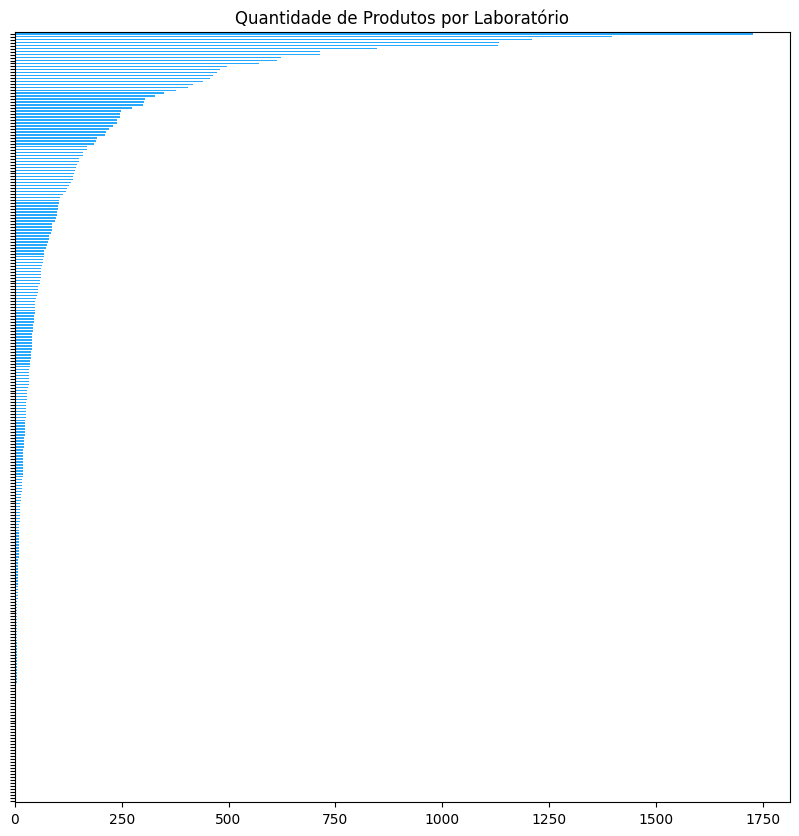

In [30]:
contagem_lab = medicamentos['laboratorio'].value_counts()\
    .sort_values(ascending=True)

ax1 = contagem_lab.plot(
    kind='barh', 
    figsize=(10, 10), 
    color="#27A9FF",
    title='Quantidade de Produtos por Laboratório',
    ylabel='',
)
ax1.set_yticklabels([])
ax1.set_ylabel('')
ax1

# 1. Encontrar 10 maiores laboratórios em número de produtos cadastrados
# 2. Encontrar 10 laboratórios com preço medio mais alto

In [31]:
medicamentos.groupby('laboratorio')['preco_final_consumidor']\
    .mean().sort_values(ascending=True).head(10)

laboratorio
LABORATORIO SIMOES LTDA.                                 6.890000
LABORATÓRIO NEO QUÍMICA COMÉRCIO E INDÚSTRIA LTDA       10.910000
LABORATORIO INDUSTRIAL FARMACÊUTICO LIFAR LTDA          13.240000
CASA GRANADO LABORATÓRIOS, FARMÁCIAS E DROGARIAS S/A    13.534000
MINÂNCORA & CIA LTDA                                    15.630000
SALBEGO LABORATÓRIO FARMACÊUTICO LTDA                   17.404000
HISAMITSU FARMACÊUTICA DO BRASIL LTDA                   18.953333
DKT DO BRASIL PRODUTOS DE USO PESSOAL LTDA              19.095000
JARRELL FARMACÊUTICA LTDA EPP                           20.315000
AVERT LABORATÓRIOS LTDA                                 26.620000
Name: preco_final_consumidor, dtype: float64

In [32]:
medicamentos.groupby(medicamentos['laboratorio'])\
    .preco_final_consumidor.mean()\
    .sort_values(ascending=False).head(10)

laboratorio
NOVARTIS BIOCIENCIAS S.A                                   1.269891e+06
SPECIALTY PHARMA GOIAS LTDA                                4.294320e+05
GILEAD SCIENCES FARMACEUTICA DO BRASIL LTDA                3.757024e+05
PRODUTOS ROCHE QUÍMICOS E FARMACÊUTICOS S.A.               2.998449e+05
HORIZON THERAPEUTICS BRASIL LTDA.                          2.652993e+05
AMRYT BRASIL COMERCIO E IMPORTACAO DE MEDICAMENTOS LTDA    2.176555e+05
PTC FARMACEUTICA DO BRASIL LTDA.                           1.356310e+05
ALEXION SERVICOS E FARMACEUTICA DO BRASIL LTDA             1.170138e+05
BIOGEN BRASIL PRODUTOS FARMACEUTICOS LTDA                  1.060474e+05
VERTEX FARMACEUTICA DO BRASIL LTDA.                        1.006159e+05
Name: preco_final_consumidor, dtype: float64

<Axes: ylabel='laboratorio'>

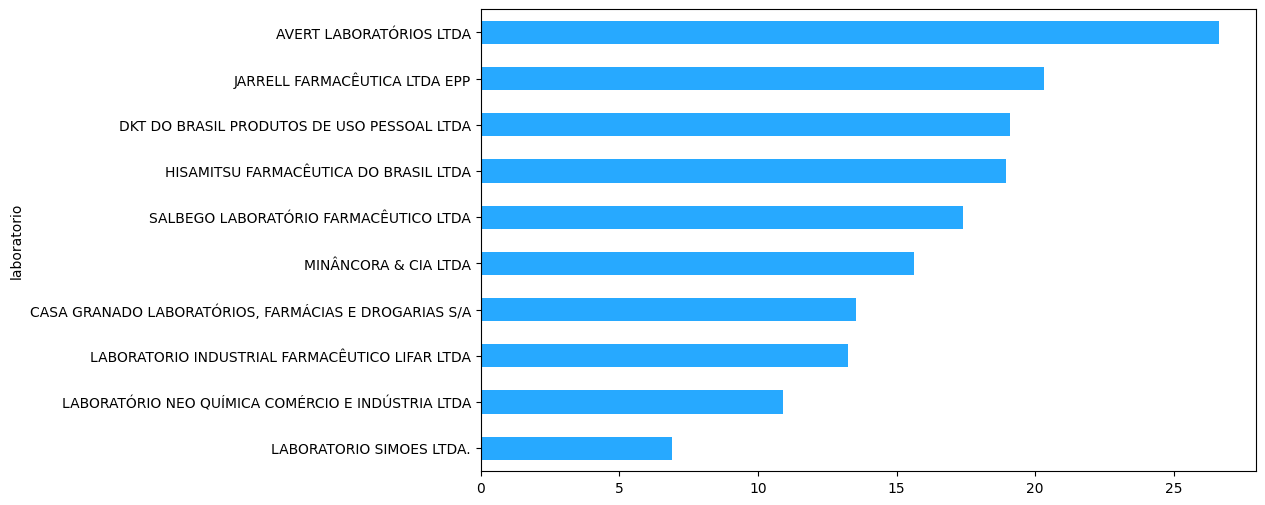

In [33]:
medicamentos.groupby(medicamentos['laboratorio'])\
    .preco_final_consumidor.mean()\
    .sort_values(ascending=True).head(10)\
    .plot(kind='barh', figsize=(10, 6), color="#27A9FF")

<Axes: title={'center': 'Quantidade de Produtos por Laboratório'}>

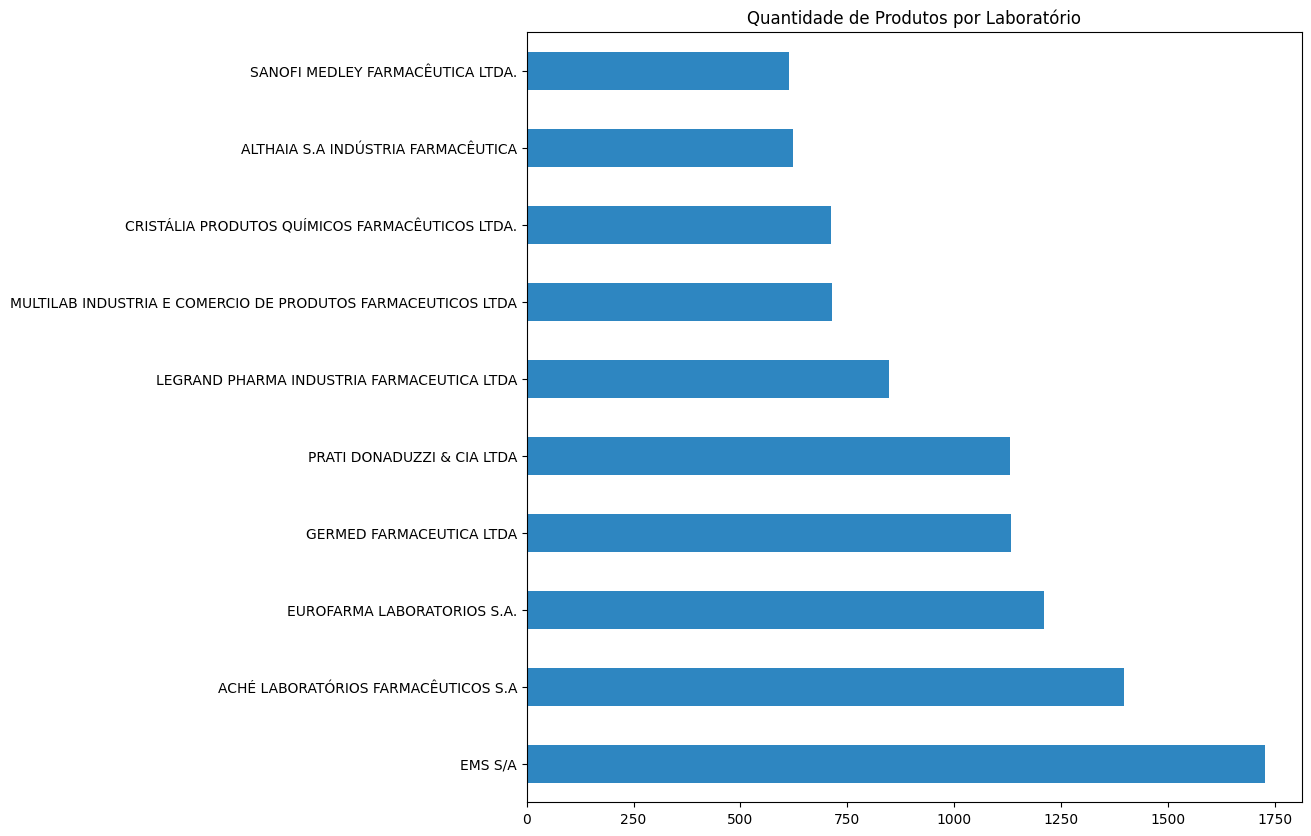

In [34]:
contagem_lab = medicamentos['laboratorio'].value_counts().sort_values(ascending=False).head(10)


ax1 = contagem_lab.plot(
    kind='barh', 
    figsize=(10, 10), 
    color='#2E86C1', 
    title='Quantidade de Produtos por Laboratório',
    ylabel='',
)
ax1

<Axes: title={'center': 'Quantidade de Produtos por Laboratório'}>

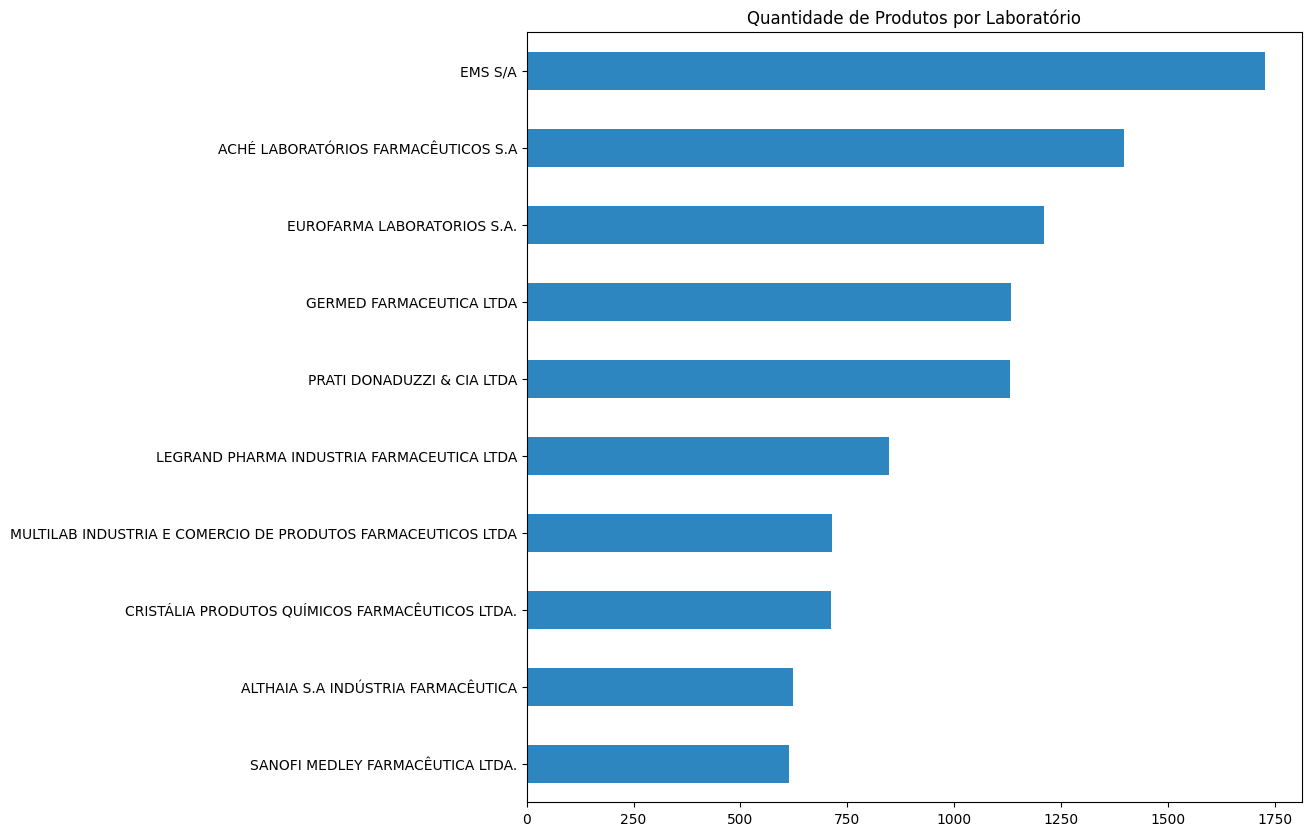

In [35]:
contagem_lab = medicamentos['laboratorio'].value_counts().head(10).sort_values(ascending=True)


ax1 = contagem_lab.plot(
    kind='barh', 
    figsize=(10, 10), 
    color='#2E86C1', 
    title='Quantidade de Produtos por Laboratório',
    ylabel='',
)
ax1

In [36]:
### Aula 10

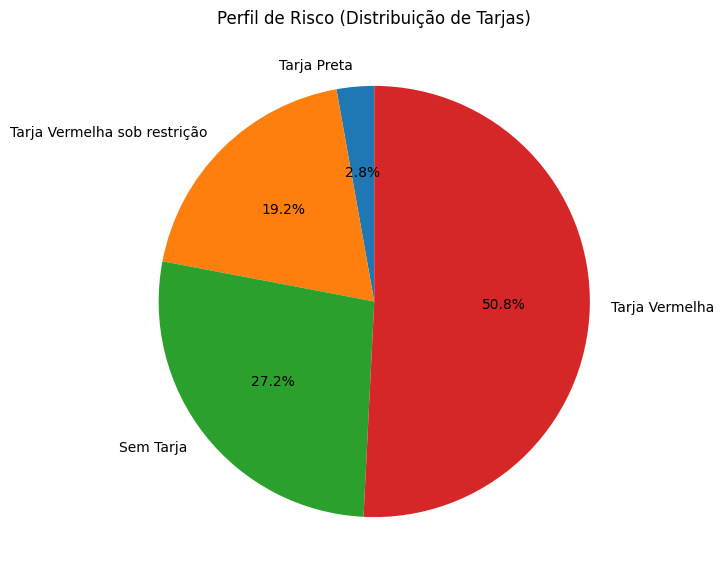

In [37]:
distribuicao_tarja = medicamentos['tarja'].value_counts().sort_values()

ax2 = distribuicao_tarja.plot(
    kind='pie',
    figsize=(7, 7),
    autopct='%1.1f%%',
    startangle=90,
    title='Perfil de Risco (Distribuição de Tarjas)',
    ylabel='' 
)

<Axes: title={'center': 'preco_final_consumidor'}, xlabel='tipo_produto'>

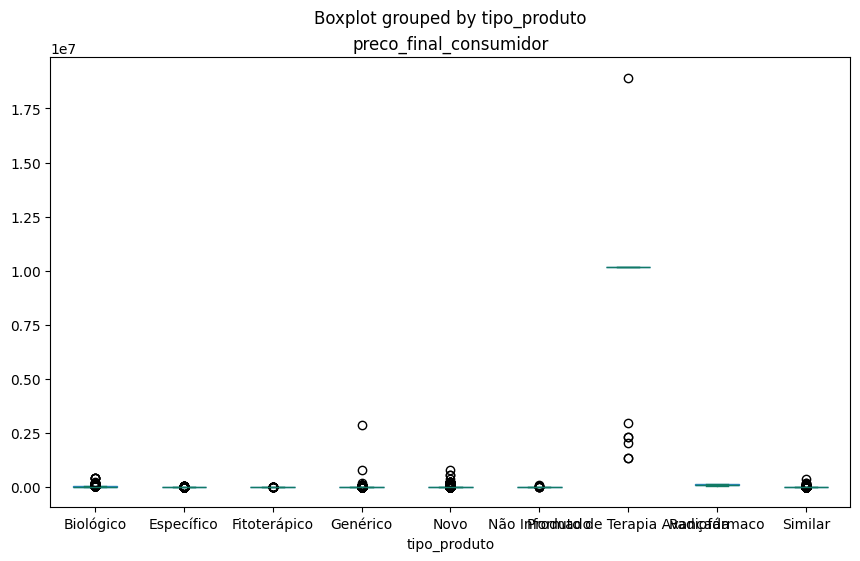

In [38]:
# Configurando o tamanho da figura
medicamentos.boxplot(
    column='preco_final_consumidor', 
    by='tipo_produto', 
    grid=False, vert=True,
    figsize=(10, 6),
    patch_artist=True,
    color=dict(boxes='#2E86C1', whiskers='#117A65', medians='#117A65', caps='#117A65'),
)

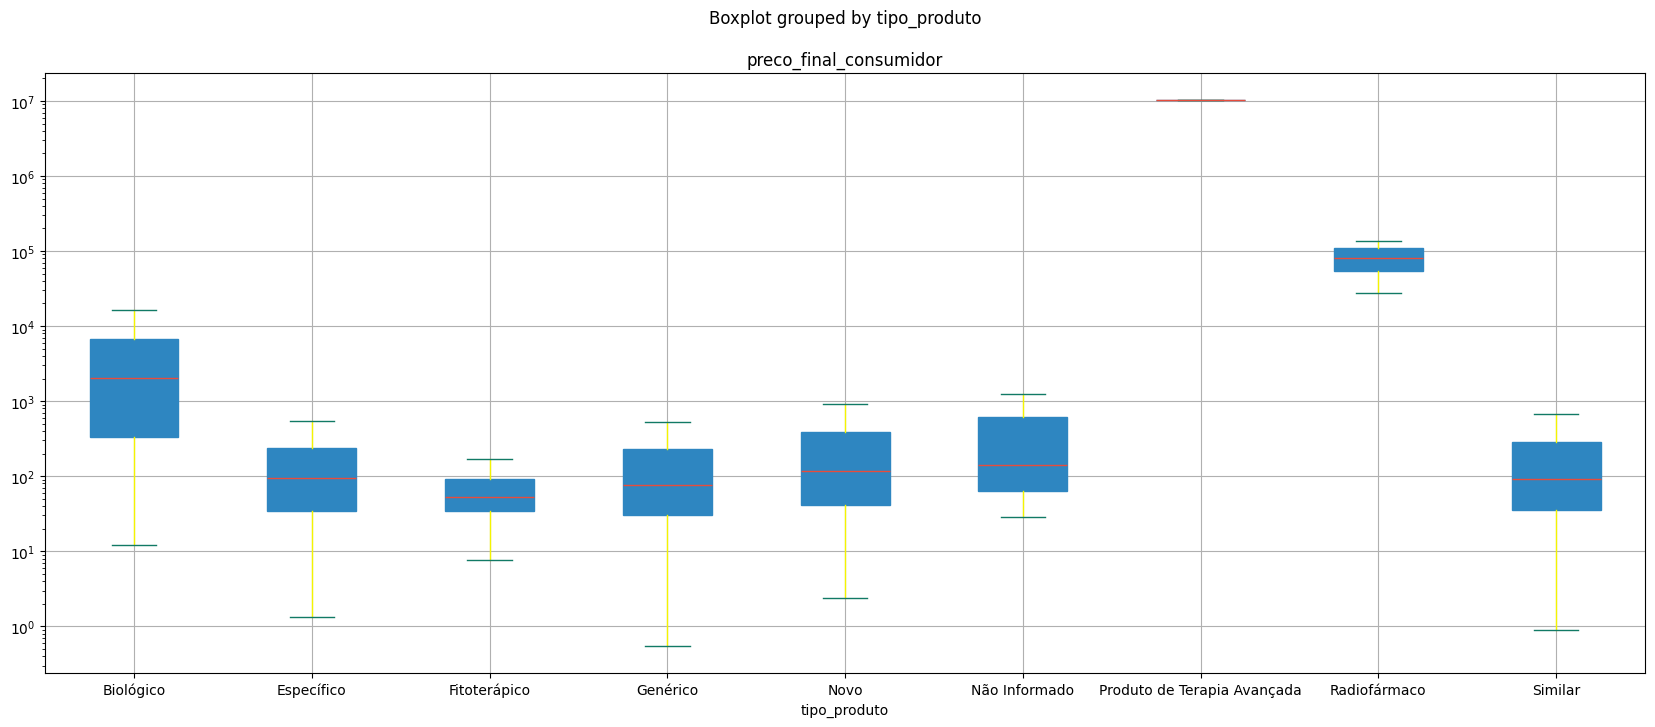

In [39]:
import matplotlib.pyplot as plt
ax = medicamentos.boxplot(
    column='preco_final_consumidor', 
    by='tipo_produto', 
    figsize=(20, 8), # Aumentei um pouco para garantir leitura
    grid=True, # Grid ajuda a ler log
    color=dict(boxes='#2E86C1', whiskers="#F4F401", medians='#e74c3c', caps='#117A65'),
    showfliers=False,
    patch_artist=True 
)
plt.yscale('log') # Transforma o eixo Y em escala logarítmica

In [40]:
# 1. ANÁLISE DE NEGÓCIO (Groupby = Tabela Dinâmica)
# Vamos agrupar por Tipo e calcular métricas chaves
analise_precos = medicamentos.groupby('tipo_produto')['preco_final_consumidor'].agg(
    Contagem=('count'),             # Quantos produtos tem?
    Preco_Minimo=('min'),           # Mais barato
    Preco_Medio=('mean'),           # Média (Cuidado!)
    Preco_Mediano=('median'),       # Mediana (A realidade do mercado)
    Preco_Maximo=('max'),           # Mais caro (Outlier)
    Desvio_Padrao=('std')           # Variação
).sort_values('Preco_Mediano', ascending=False)

# 2. FORMATANDO COMO PLANILHA (Styler)
# Isso gera uma visualização HTML idêntica ao Excel com formatação condicional
formatacao = {
    'Preco_Minimo': 'R$ {:,.2f}',
    'Preco_Medio': 'R$ {:,.2f}',
    'Preco_Mediano': 'R$ {:,.2f}',
    'Preco_Maximo': 'R$ {:,.2f}',
    'Desvio_Padrao': 'R$ {:,.2f}'
}

print("=== RELATÓRIO DE PRECIFICAÇÃO POR CATEGORIA ===")
display(
    analise_precos.style
    .format(formatacao)
    # Gradiente de cor para destacar os valores altos (Heatmap)
    .background_gradient(subset=['Preco_Mediano', 'Preco_Maximo'], cmap='Reds')
    .background_gradient(subset=['Contagem'], cmap='Blues')
)

=== RELATÓRIO DE PRECIFICAÇÃO POR CATEGORIA ===


,Contagem,Preco_Minimo,Preco_Medio,Preco_Mediano,Preco_Maximo,Desvio_Padrao
tipo_produto,,,,,,
Produto de Terapia Avançada,44,"R$ 1,321,202.58","R$ 9,264,894.18","R$ 10,175,722.18","R$ 18,932,240.08","R$ 3,197,410.02"
Radiofármaco,2,"R$ 27,299.63","R$ 81,873.12","R$ 81,873.12","R$ 136,446.61","R$ 77,178.57"
Biológico,1485,R$ 12.04,"R$ 9,709.60","R$ 2,035.30","R$ 419,418.27","R$ 30,569.67"
Não Informado,57,R$ 28.32,"R$ 2,920.13",R$ 140.23,"R$ 91,698.23","R$ 12,601.74"
Novo,3813,R$ 2.38,"R$ 4,419.75",R$ 116.01,"R$ 789,872.13","R$ 25,096.35"
Específico,2182,R$ 1.32,R$ 341.28,R$ 94.77,"R$ 8,301.11",R$ 845.19
Similar,9018,R$ 0.90,R$ 971.65,R$ 93.12,"R$ 358,586.98","R$ 6,186.96"
Genérico,9816,R$ 0.55,"R$ 1,092.33",R$ 76.75,"R$ 2,861,191.01","R$ 30,187.95"
Fitoterápico,358,R$ 7.62,R$ 99.72,R$ 52.48,"R$ 2,056.84",R$ 208.49


In [41]:
medicamentos.columns

Index(['ativo', 'CNPJ', 'laboratorio', 'registro', 'EAN 1', 'EAN 2', 'EAN 3',
       'produto', 'apresentacao', 'classe_terapeutica', 'tipo_produto',
       'regime_preco', 'restricao_hospitalar', 'comercializavel', 'tarja',
       'preco_final_consumidor'],
      dtype='object')

(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
        1.e+06, 1.e+07, 1.e+08, 1.e+09]),
 [Text(0.01, 0, '$\\mathdefault{10^{-2}}$'),
  Text(0.1, 0, '$\\mathdefault{10^{-1}}$'),
  Text(1.0, 0, '$\\mathdefault{10^{0}}$'),
  Text(10.0, 0, '$\\mathdefault{10^{1}}$'),
  Text(100.0, 0, '$\\mathdefault{10^{2}}$'),
  Text(1000.0, 0, '$\\mathdefault{10^{3}}$'),
  Text(10000.0, 0, '$\\mathdefault{10^{4}}$'),
  Text(100000.0, 0, '$\\mathdefault{10^{5}}$'),
  Text(1000000.0, 0, '$\\mathdefault{10^{6}}$'),
  Text(10000000.0, 0, '$\\mathdefault{10^{7}}$'),
  Text(100000000.0, 0, '$\\mathdefault{10^{8}}$'),
  Text(1000000000.0, 0, '$\\mathdefault{10^{9}}$')])

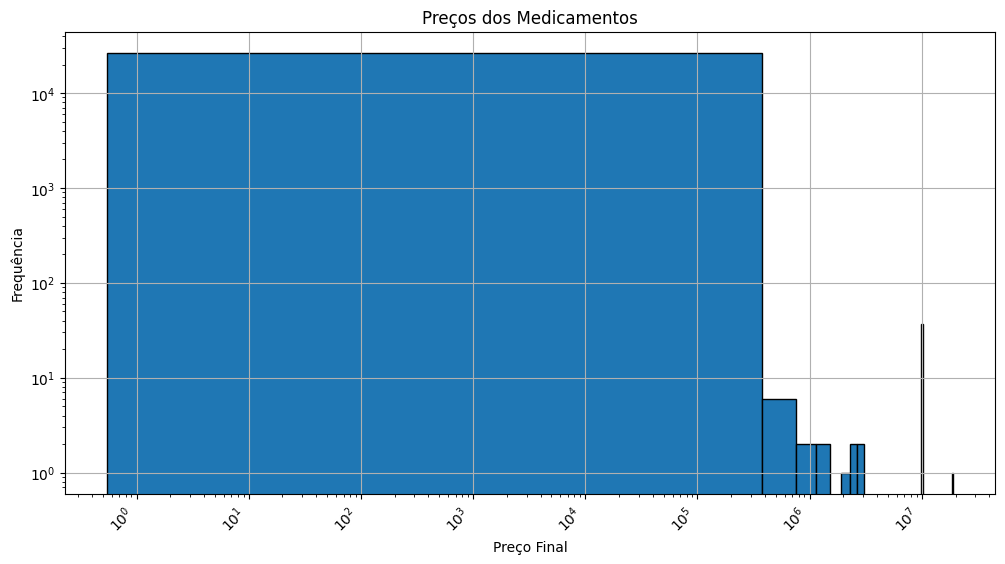

In [42]:
# Distribui preços
plt.figure(figsize=(12, 6))
medicamentos['preco_final_consumidor'].hist(bins=50, edgecolor='black')
plt.xlabel('Preço Final')
plt.ylabel('Frequência')
plt.title('Preços dos Medicamentos')
plt.yscale('log')
plt.xscale('log')
plt.xticks(rotation=45, ha='right')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'EMS S/A'),
  Text(1, 0, 'ACHÉ LABORATÓRIOS FARMACÊUTICOS S.A'),
  Text(2, 0, 'EUROFARMA LABORATORIOS S.A.'),
  Text(3, 0, 'GERMED FARMACEUTICA LTDA'),
  Text(4, 0, 'PRATI DONADUZZI & CIA LTDA'),
  Text(5, 0, 'LEGRAND PHARMA INDUSTRIA FARMACEUTICA LTDA'),
  Text(6, 0, 'MULTILAB INDUSTRIA E COMERCIO DE PRODUTOS FARMACEUTICOS LTDA'),
  Text(7, 0, 'CRISTÁLIA PRODUTOS QUÍMICOS FARMACÊUTICOS LTDA.'),
  Text(8, 0, 'ALTHAIA S.A INDÚSTRIA FARMACÊUTICA'),
  Text(9, 0, 'SANOFI MEDLEY FARMACÊUTICA LTDA.')])

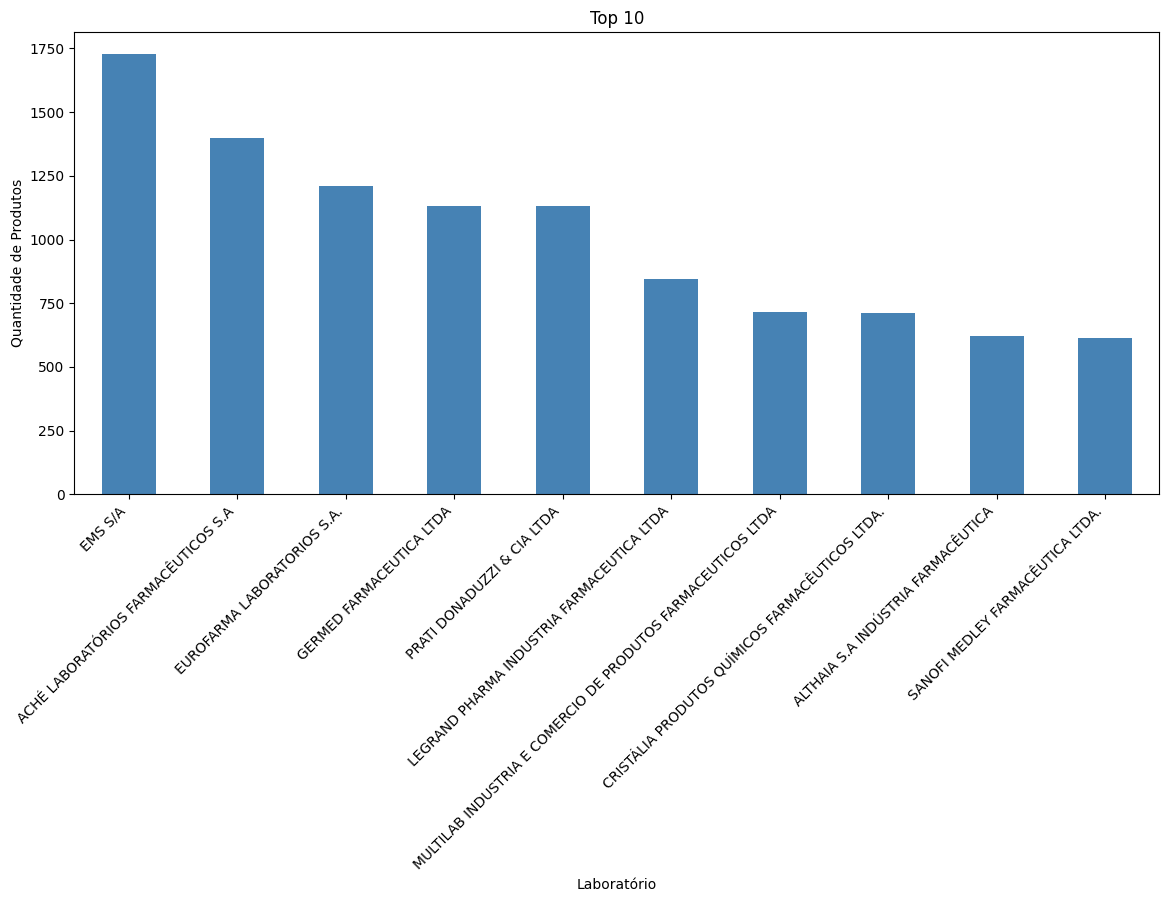

In [43]:
plt.figure(figsize=(14, 6))
medicamentos['laboratorio'].value_counts().head(10).plot(kind='bar', color='steelblue')
plt.title('Top 10')
plt.xlabel('Laboratório')
plt.ylabel('Quantidade de Produtos')

plt.xticks(rotation=45, ha='right')



In [44]:
medicamentos.columns


Index(['ativo', 'CNPJ', 'laboratorio', 'registro', 'EAN 1', 'EAN 2', 'EAN 3',
       'produto', 'apresentacao', 'classe_terapeutica', 'tipo_produto',
       'regime_preco', 'restricao_hospitalar', 'comercializavel', 'tarja',
       'preco_final_consumidor'],
      dtype='object')

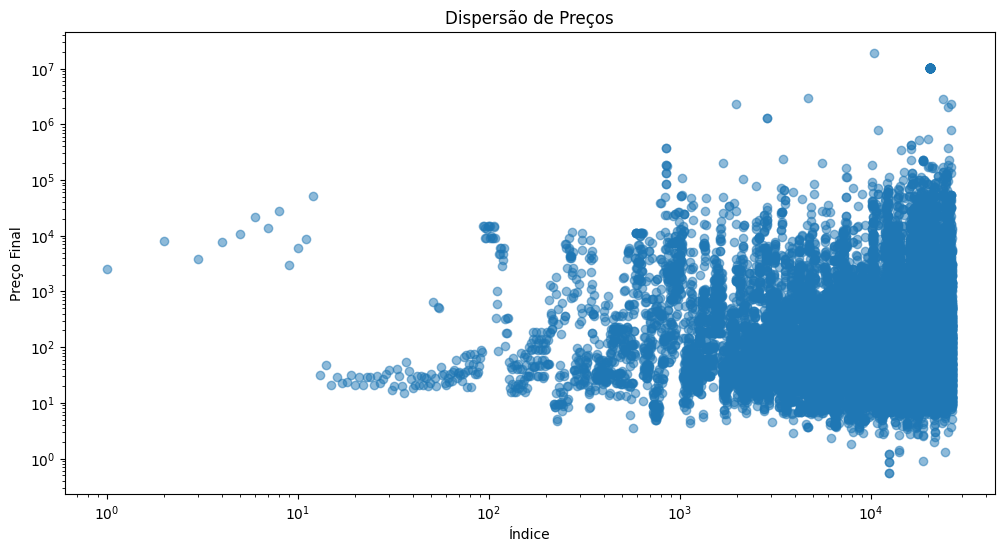

In [50]:
plt.figure(figsize=(12, 6))
plt.scatter(medicamentos.index, medicamentos['preco_final_consumidor'], alpha=0.5)
plt.xlabel('Índice')
plt.ylabel('Preço Final')
plt.title('Dispersão de Preços')
plt.yscale('log')
plt.xscale('log')
plt.show()

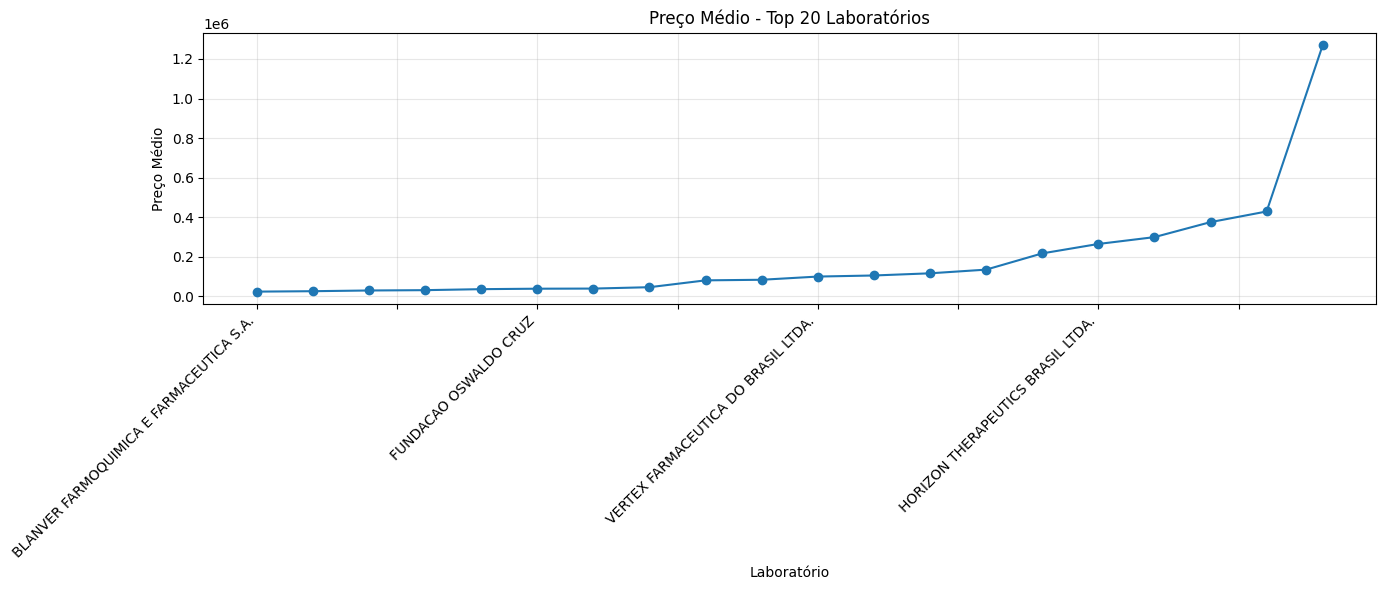

In [46]:
plt.figure(figsize=(14, 6))
medicamentos.groupby('laboratorio')['preco_final_consumidor'].mean().sort_values().tail(20).plot(kind='line', marker='o')
plt.title('Preço Médio - Top 20 Laboratórios')
plt.xlabel('Laboratório')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [47]:
medicamentos.groupby(['regime_preco','tipo_produto'])['regime_preco'].count()

regime_preco  tipo_produto               
Liberado      Biológico                        48
              Específico                      435
              Fitoterápico                    358
              Genérico                        571
              Novo                            401
              Não Informado                     4
              Similar                        1013
Regulado      Biológico                      1437
              Específico                     1747
              Genérico                       9245
              Novo                           3412
              Não Informado                    53
              Produto de Terapia Avançada      44
              Radiofármaco                      2
              Similar                        8005
Name: regime_preco, dtype: int64

In [51]:
medicamentos.columns

Index(['ativo', 'CNPJ', 'laboratorio', 'registro', 'EAN 1', 'EAN 2', 'EAN 3',
       'produto', 'apresentacao', 'classe_terapeutica', 'tipo_produto',
       'regime_preco', 'restricao_hospitalar', 'comercializavel', 'tarja',
       'preco_final_consumidor'],
      dtype='object')

In [52]:
mas gosto de L com s

SyntaxError: invalid syntax (1521361392.py, line 1)